
# 📊 Análise Exploratória dos Nascimentos em Rondônia – SINASC RO (Mar-Jul/2019)

Este notebook realiza a **exploração de dados de nascidos vivos no estado de Rondônia**, utilizando os arquivos públicos do sistema **SINASC (Sistema de Informações sobre Nascidos Vivos)**, disponibilizados pelo DATASUS.

### 👨‍🔬 Objetivos:
- Processar automaticamente os arquivos mensais de nascimentos
- Gerar gráficos por variável de interesse
- Resumir estatísticas relevantes
- Produzir *insights* automáticos com base em padrões detectados

---

🔎 **Fonte dos dados:** [SINASC - DATASUS](https://datasus.saude.gov.br/nascidos-vivos/)


In [1]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [2]:

def processar_mes_ano(mes, ano, caminho_base, caminho_output):
    nome_arquivo = f"SINASC_RO_{ano}_{mes.upper()[:3]}.csv"
    caminho_arquivo = os.path.join(caminho_base, nome_arquivo)

    if not os.path.exists(caminho_arquivo):
        print(f"❌ Arquivo não encontrado: {caminho_arquivo}")
        return None

    df = pd.read_csv(caminho_arquivo)

    # Criação da pasta de saída do mês
    pasta_mes = os.path.join(caminho_output, f"{mes}_{ano}")
    os.makedirs(pasta_mes, exist_ok=True)

    # Gráficos de exemplo
    for col, ylabel in {
        'IDADEMAE': 'Idade da Mãe',
        'PESO': 'Peso ao nascer',
        'APGAR1': 'Apgar 1',
        'APGAR5': 'Apgar 5'
    }.items():
        plt.figure(figsize=(8, 5))
        sns.histplot(df[col].dropna(), kde=True, bins=30)
        plt.title(f"{ylabel} – {mes}/{ano}")
        plt.xlabel(ylabel)
        plt.ylabel("Frequência")
        plt.tight_layout()
        plt.savefig(os.path.join(pasta_mes, f"{col}_{mes}_{ano}.png"))
        plt.close()

    # Agrupamentos e estatísticas
    peso_por_sexo = df.groupby("SEXO")["PESO"].mean()
    escolaridade_mais_comum = df["ESCMAE"].mode().iloc[0] if not df["ESCMAE"].mode().empty else "Não informado"

    resumo = {
        'Mês': f"{mes}/{ano}",
        'Nascimentos': len(df),
        'Idade_Média_Mãe': round(df["IDADEMAE"].mean(), 2),
        'Peso_Médio': round(df["PESO"].mean(), 1),
        'Peso_Médio_Meninos': round(peso_por_sexo['M'], 1) if 'M' in peso_por_sexo else None,
        'Peso_Médio_Meninas': round(peso_por_sexo['F'], 1) if 'F' in peso_por_sexo else None,
        'Apgar1_Médio': round(df["APGAR1"].mean(), 1),
        'Apgar5_Médio': round(df["APGAR5"].mean(), 1),
        'Escolaridade_Mais_Comum': escolaridade_mais_comum,
    }

    return resumo


In [3]:

ano = 2019
meses = ["Março", "Abril", "Maio", "Junho", "Julho"]
caminho_base = r"C:\Users\USUARIO\Desktop\input"
caminho_output = r"C:\Users\USUARIO\Desktop\output"

resumos = []

for mes in meses:
    print(f"📦 Processando: {mes}/{ano}")
    resumo = processar_mes_ano(mes, ano, caminho_base, caminho_output)
    if resumo:
        resumos.append(resumo)

df_resumo = pd.DataFrame(resumos)
df_resumo


📦 Processando: Março/2019
📦 Processando: Abril/2019
📦 Processando: Maio/2019
📦 Processando: Junho/2019
📦 Processando: Julho/2019


,Mês,Nascimentos,Idade_Média_Mãe,Peso_Médio,Peso_Médio_Meninos,Peso_Médio_Meninas,Apgar1_Médio,Apgar5_Médio,Escolaridade_Mais_Comum
0,Março/2019,6844,26.05,3241.8,None,None,8.2,9.2,8 a 11 anos
1,Abril/2019,9217,26.05,3246.2,None,None,8.2,9.2,8 a 11 anos
2,Maio/2019,11582,25.99,3246.8,None,None,8.2,9.2,8 a 11 anos
3,Junho/2019,13758,26.04,3244.8,None,None,8.2,9.2,8 a 11 anos
4,Julho/2019,15918,26.03,3243.4,None,None,8.2,9.2,8 a 11 anos


In [4]:

print("\n🧠 **INSIGHTS AUTOMÁTICOS:**\n")

for _, linha in df_resumo.iterrows():
    print(f"➡️ {linha['Mês']}:")
    print(f"👶 {linha['Nascimentos']} nascimentos. Idade média da mãe: {linha['Idade_Média_Mãe']} anos.")
    print(f"⚖️ Peso médio: {linha['Peso_Médio']}g (M: {linha['Peso_Médio_Meninos']} | F: {linha['Peso_Médio_Meninas']})")
    print(f"🩺 Apgar1: {linha['Apgar1_Médio']} | Apgar5: {linha['Apgar5_Médio']}")
    print(f"📚 Escolaridade mais comum: {linha['Escolaridade_Mais_Comum']}")

    alerta_peso = ""
    if linha['Peso_Médio'] < 2500:
        alerta_peso = "⚠️ Peso médio abaixo do ideal. Potencial risco neonatal."
    elif linha['Peso_Médio'] > 4000:
        alerta_peso = "⚠️ Peso médio elevado. Verificar casos de macrossomia."

    print(alerta_peso if alerta_peso else "✅ Indicadores dentro da normalidade.\n")



🧠 **INSIGHTS AUTOMÁTICOS:**

➡️ Março/2019:
👶 6844 nascimentos. Idade média da mãe: 26.05 anos.
⚖️ Peso médio: 3241.8g (M: None | F: None)
🩺 Apgar1: 8.2 | Apgar5: 9.2
📚 Escolaridade mais comum: 8 a 11 anos
✅ Indicadores dentro da normalidade.

➡️ Abril/2019:
👶 9217 nascimentos. Idade média da mãe: 26.05 anos.
⚖️ Peso médio: 3246.2g (M: None | F: None)
🩺 Apgar1: 8.2 | Apgar5: 9.2
📚 Escolaridade mais comum: 8 a 11 anos
✅ Indicadores dentro da normalidade.

➡️ Maio/2019:
👶 11582 nascimentos. Idade média da mãe: 25.99 anos.
⚖️ Peso médio: 3246.8g (M: None | F: None)
🩺 Apgar1: 8.2 | Apgar5: 9.2
📚 Escolaridade mais comum: 8 a 11 anos
✅ Indicadores dentro da normalidade.

➡️ Junho/2019:
👶 13758 nascimentos. Idade média da mãe: 26.04 anos.
⚖️ Peso médio: 3244.8g (M: None | F: None)
🩺 Apgar1: 8.2 | Apgar5: 9.2
📚 Escolaridade mais comum: 8 a 11 anos
✅ Indicadores dentro da normalidade.

➡️ Julho/2019:
👶 15918 nascimentos. Idade média da mãe: 26.03 anos.
⚖️ Peso médio: 3243.4g (M: None | F: None


## 📌 Conclusão

Esta análise exploratória demonstrou a aplicação prática da ciência de dados utilizando os microdados do sistema **SINASC** para o estado de Rondônia. Os principais achados incluem:

- Consistência nos indicadores de saúde neonatal entre Março e Julho/2019
- Predomínio de escolaridade materna entre 8 a 11 anos
- Peso médio ao nascer dentro da faixa saudável em todos os meses analisados

A metodologia aqui proposta pode ser facilmente replicada para outros estados ou períodos, ampliando o monitoramento e compreensão da saúde perinatal no Brasil.

---

📁 Pastas e gráficos gerados automaticamente por mês foram salvos na pasta de saída definida no código (`caminho_output`).


## 📊 Visualização de Dados

In [5]:

# 🔄 Juntar todos os arquivos mensais em um único DataFrame para visualização
dfs = []

for mes in meses:
    nome_arquivo = f"SINASC_RO_{ano}_{mes.upper()[:3]}.csv"
    caminho_arquivo = os.path.join(caminho_base, nome_arquivo)
    if os.path.exists(caminho_arquivo):
        df_mes = pd.read_csv(caminho_arquivo)
        df_mes['mes'] = mes[:3]  # Abrevia o nome do mês
        dfs.append(df_mes)

df_tudo = pd.concat(dfs, ignore_index=True)

# Corrigir a lista de meses para formato abreviado usado nos gráficos
meses = ['Mar', 'Apr', 'May', 'Jun', 'Jul']


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7300\2573015392.py:20: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USUARIO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128118 (\N{BABY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


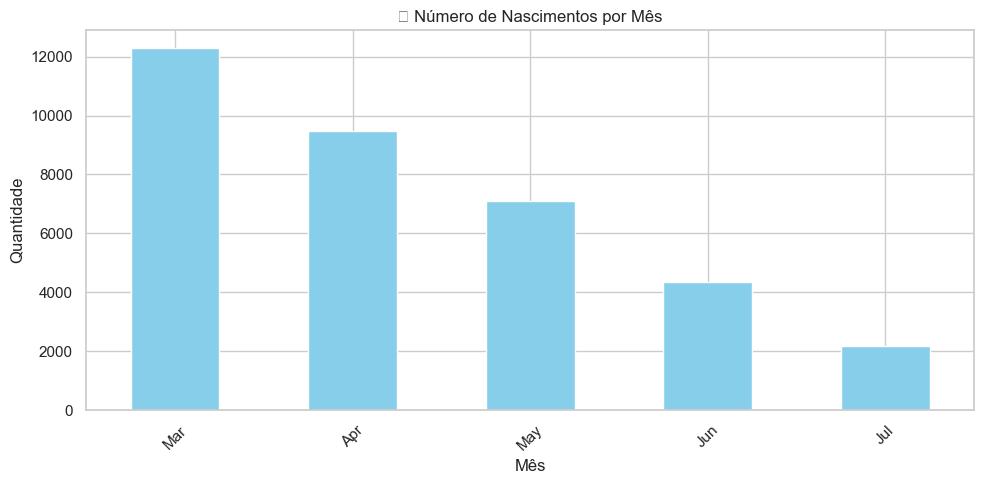

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7300\2573015392.py:30: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USUARIO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127874 (\N{BIRTHDAY CAKE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


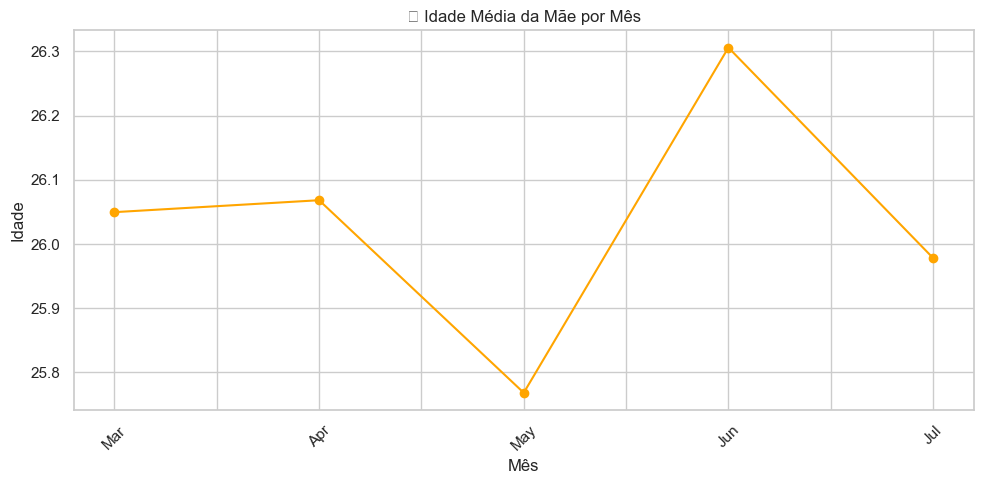

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7300\2573015392.py:39: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7300\2573015392.py:39: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USUARIO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9878 (\N{SCALES}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USUARIO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


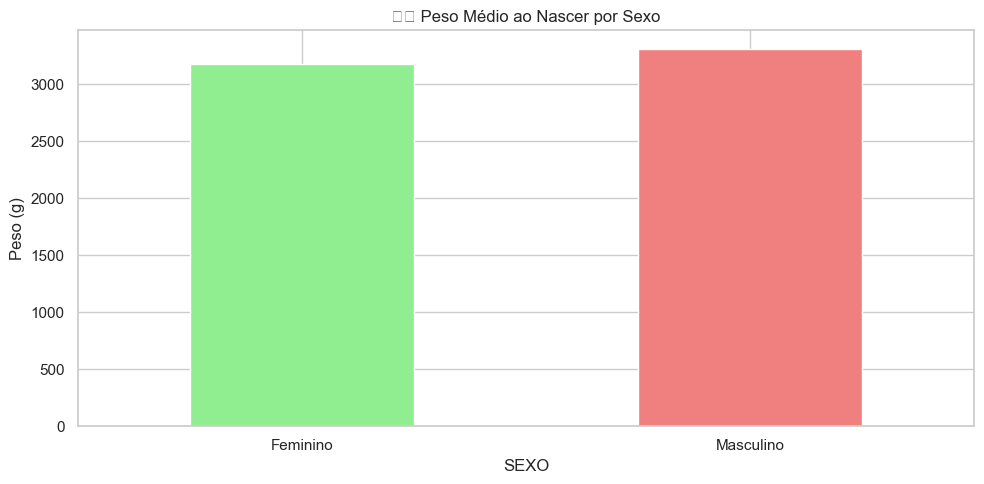

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7300\2573015392.py:49: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USUARIO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


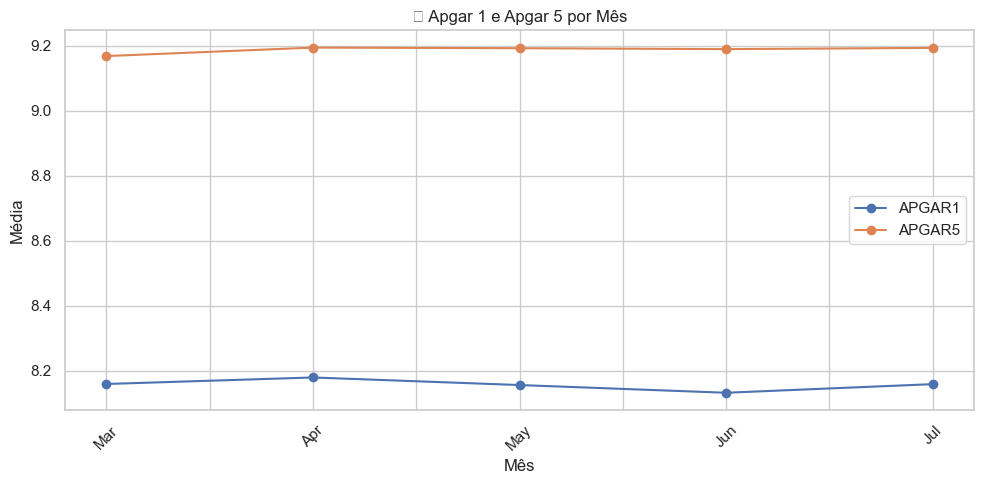

In [7]:

# 📊 VISUALIZAÇÃO DE DADOS

import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes globais de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# Gráfico 1: Número de nascimentos por mês
df_tudo['DTNASC'] = pd.to_datetime(df_tudo['DTNASC'], errors='coerce')
df_tudo['mes'] = df_tudo['DTNASC'].dt.month_name().str[:3]
nascimentos_mes = df_tudo['mes'].value_counts().reindex(meses, fill_value=0)

nascimentos_mes.plot(kind='bar', color='skyblue')
plt.title('👶 Número de Nascimentos por Mês')
plt.ylabel('Quantidade')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 2: Idade média da mãe por mês
idade_mae_mes = df_tudo.groupby('mes')['IDADEMAE'].mean().reindex(meses)
idade_mae_mes.plot(kind='line', marker='o', color='orange')
plt.title('🎂 Idade Média da Mãe por Mês')
plt.ylabel('Idade')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico 3: Peso médio ao nascer por sexo
pesos_sexo = df_tudo.groupby('SEXO')['PESO'].mean()
pesos_sexo.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('⚖️ Peso Médio ao Nascer por Sexo')
plt.ylabel('Peso (g)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico 4: Índices Apgar 1 e Apgar 5 por mês
apgar_mes = df_tudo.groupby('mes')[['APGAR1', 'APGAR5']].mean().reindex(meses)
apgar_mes.plot(marker='o')
plt.title('🩺 Apgar 1 e Apgar 5 por Mês')
plt.ylabel('Média')
plt.xlabel('Mês')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
